In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

#Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix

#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df = pd.read_csv('Telecom_Customer_Churn.csv')
df.shape

(7043, 21)

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
print('>>>> # of Rows ::', df.shape[0])
print('>>>> # of Columns ::', df.shape[1])
print('>>>> # of unique values in df <<<<')
for i in df:
    print(i, '--->', df[i].nunique())

>>>> # of Rows :: 7043
>>>> # of Columns :: 21
>>>> # of unique values in df <<<<
customerID ---> 7043
gender ---> 2
SeniorCitizen ---> 2
Partner ---> 2
Dependents ---> 2
tenure ---> 73
PhoneService ---> 2
MultipleLines ---> 3
InternetService ---> 3
OnlineSecurity ---> 3
OnlineBackup ---> 3
DeviceProtection ---> 3
TechSupport ---> 3
StreamingTV ---> 3
StreamingMovies ---> 3
Contract ---> 3
PaperlessBilling ---> 2
PaymentMethod ---> 4
MonthlyCharges ---> 1585
TotalCharges ---> 6531
Churn ---> 2


In [7]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print(df[i].describe())
    else:
        print(df[i].unique())

####### customerID #######
count           7043
unique          7043
top       2866-IKBTM
freq               1
Name: customerID, dtype: object
####### gender #######
['Female' 'Male']
####### SeniorCitizen #######
[0 1]
####### Partner #######
['Yes' 'No']
####### Dependents #######
['No' 'Yes']
####### tenure #######
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
####### PhoneService #######
['No' 'Yes']
####### MultipleLines #######
['No phone service' 'No' 'Yes']
####### InternetService #######
['DSL' 'Fiber optic' 'No']
####### OnlineSecurity #######
['No' 'Yes' 'No internet service']
####### OnlineBackup #######
['Yes' 'No' 'No internet service']
####### DeviceProtection #######
['No' 'Yes' 'No internet service']
####### TechSupport #######
['No' 'Yes' 'No internet service']
####### StreamingTV #######
['No' 'Yes' 'No internet servic

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observations:
    1. We will convert SeniorCitizen in to 1 and 0 for visualization.
    2. customerID is unique and can be removed.
    3. tenure and MonthlyCharges are the only ones that will be in numerical form, after SeniorCitizen conversion.
    4. tenure can be split into groups.
    5. Everyone for 'No' in PhoneService must also have 'No multiple lines'.

Skewness of tenure = 0.24
Skewness of MonthlyCharges = -0.22


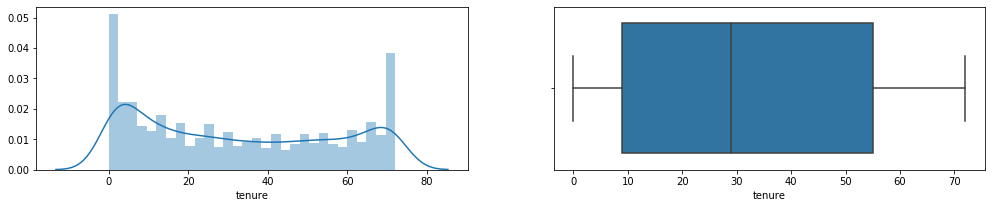

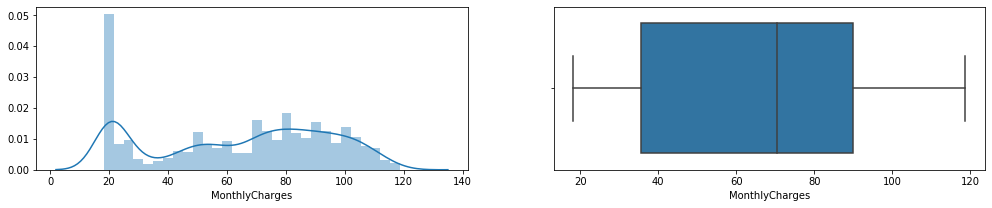

In [9]:
#Univariate analysis of numerical features
for i in ['tenure', 'MonthlyCharges']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

1. No skew or outliners found in either of them.
2. Monthly chareges are more for 20.
3. tenure is high at 0-5 and 70. We will convert them into groups.

In [10]:
df['SeniorCitizen'].replace({1:'Yes', 0:'No'}, inplace=True)
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
lst = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in lst:
    df[i].replace({'No internet service':'No'}, inplace=True)
    print('Unique values in', i, '::\n', df[i].unique())

Unique values in OnlineSecurity ::
 ['No' 'Yes']
Unique values in OnlineBackup ::
 ['Yes' 'No']
Unique values in DeviceProtection ::
 ['No' 'Yes']
Unique values in TechSupport ::
 ['No' 'Yes']
Unique values in StreamingTV ::
 ['No' 'Yes']
Unique values in StreamingMovies ::
 ['No' 'Yes']


In [12]:
df['MultipleLines'].replace({'No phone service':'No'}, inplace=True)
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df['Contract'].replace({'Month-to-month':'Monthly', 'One year':'Yearly', 'Two year':'Biennial'}, inplace=True)
df['Contract'].unique()

array(['Monthly', 'Yearly', 'Biennial'], dtype=object)

In [14]:
df['PaymentMethod'].replace({'Electronic check':'E-Cheque', 'Mailed check':'Mailed-Cheque',
                             'Bank transfer (automatic)':'Auto-Bank-Transfer',
                             'Credit card (automatic)':'Auto-CreditCard'}, inplace=True)
df['PaymentMethod'].unique()

array(['E-Cheque', 'Mailed-Cheque', 'Auto-Bank-Transfer',
       'Auto-CreditCard'], dtype=object)

In [15]:
df.drop(columns=['customerID'], axis=1, inplace=True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
df['TotalCharges'].value_counts().head(10)

20.2     11
         11
19.75     9
19.9      8
19.65     8
20.05     8
19.55     7
45.3      7
19.45     6
20.25     6
Name: TotalCharges, dtype: int64

In [17]:
df = df[df['TotalCharges']!=' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.shape

(7032, 20)

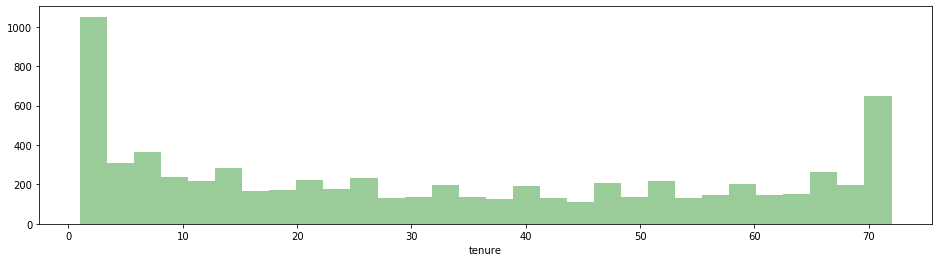

In [18]:
plt.figure(figsize=(16,4))
sns.distplot(df['tenure'], bins=30, kde=False, color='Green')

In [19]:
# pd.qcut(df['tenure'], q=5) > [(0.999, 6.0] < (6.0, 20.0] < (20.0, 40.0] < (40.0, 60.8] < (60.8, 72.0]]
labels = ['T_Group1', 'T_Group2', 'T_Group3', 'T_Group4', 'T_Group5']
df['Tenure_Group'] = pd.qcut(df['tenure'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=labels)
df['Tenure_Group'] = df['Tenure_Group'].astype(str)
df['Tenure_Group'].value_counts()

T_Group1    1470
T_Group3    1408
T_Group5    1407
T_Group2    1397
T_Group4    1350
Name: Tenure_Group, dtype: int64

In [20]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Unknown >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 21
>>> Number of Categorical Features :: 18
>>> Number of Numerical Features :: 3


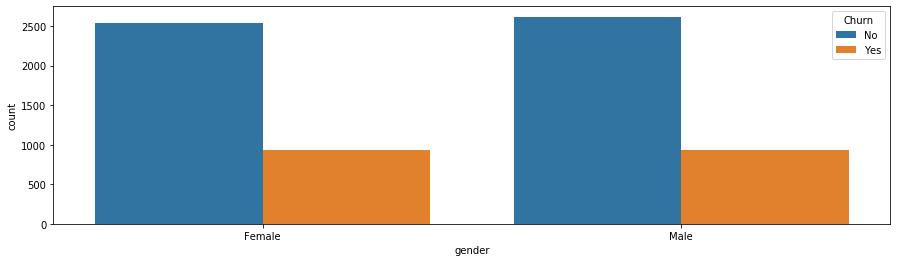

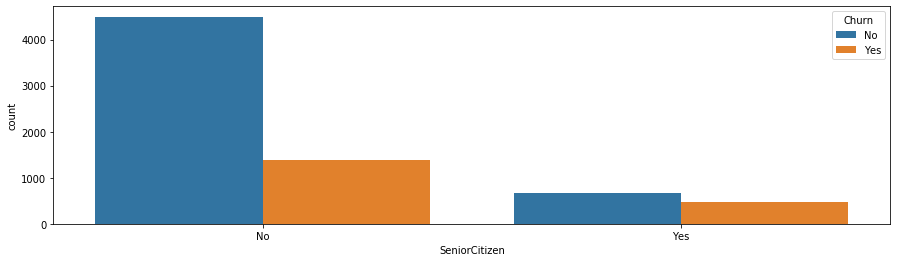

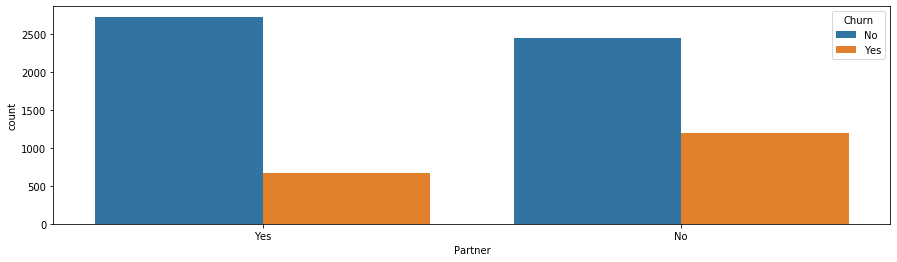

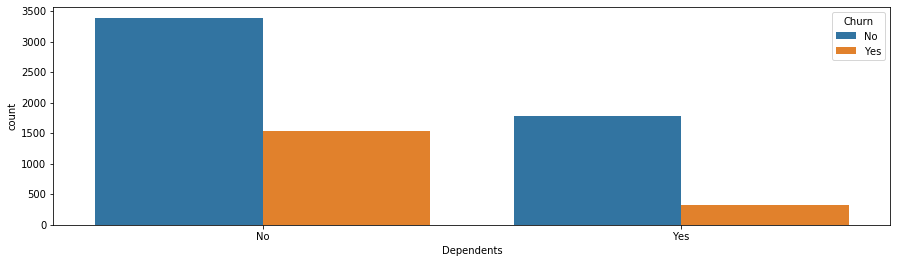

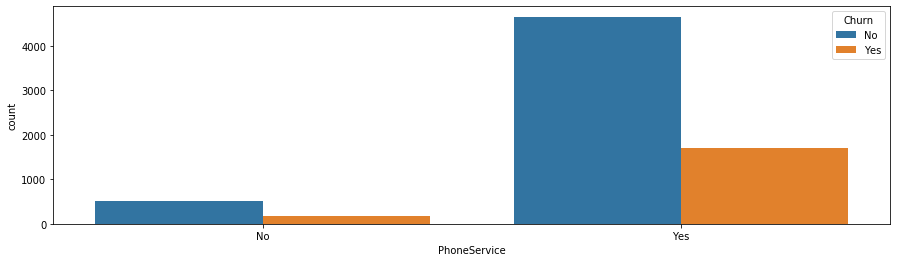

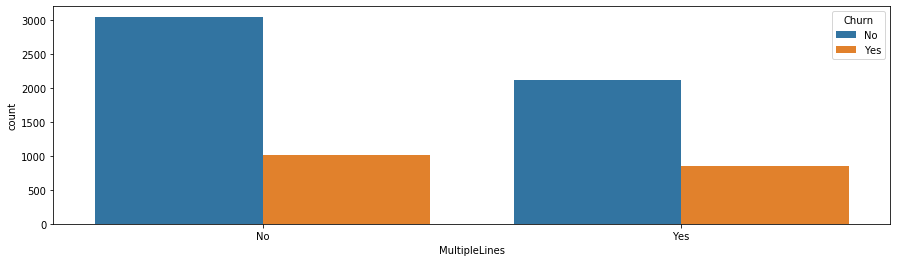

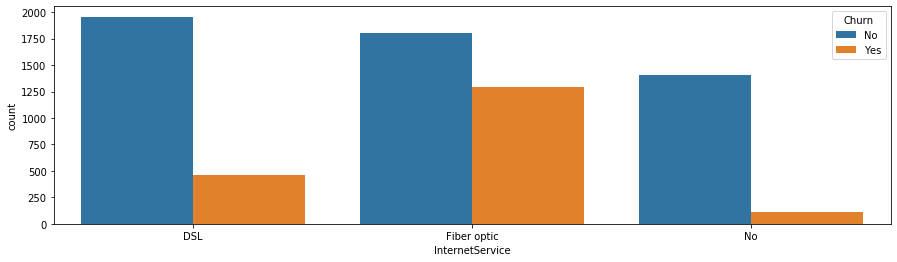

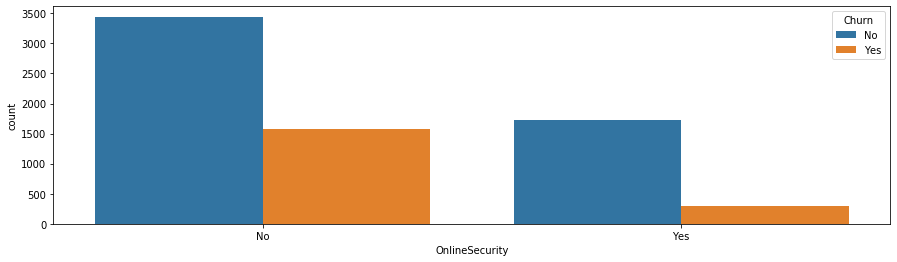

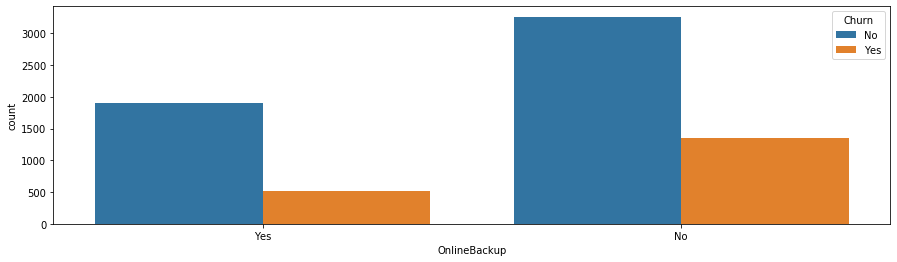

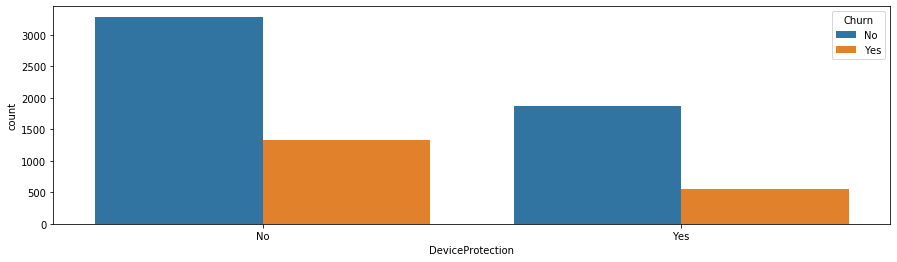

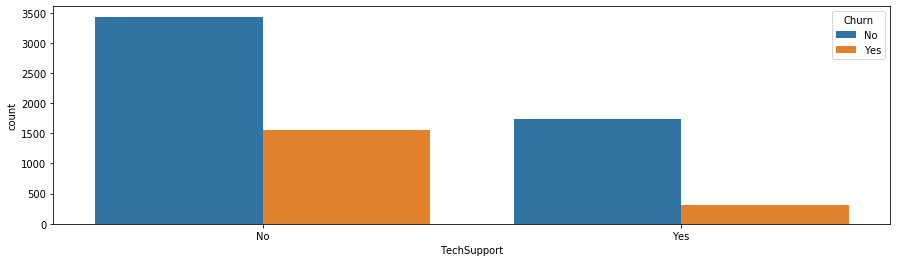

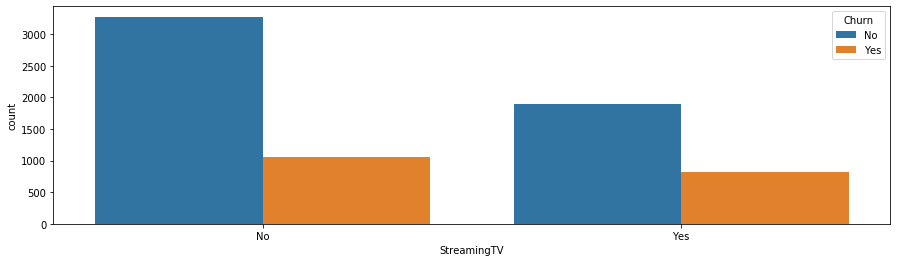

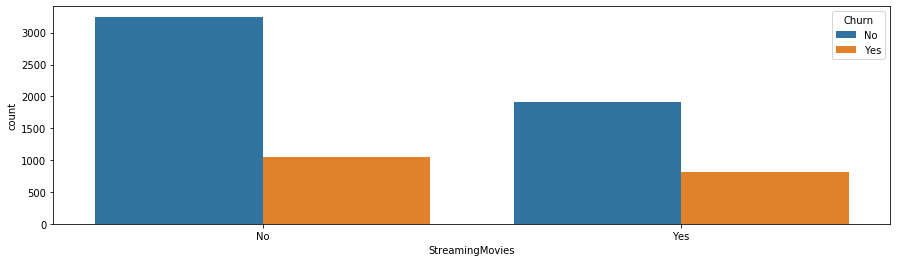

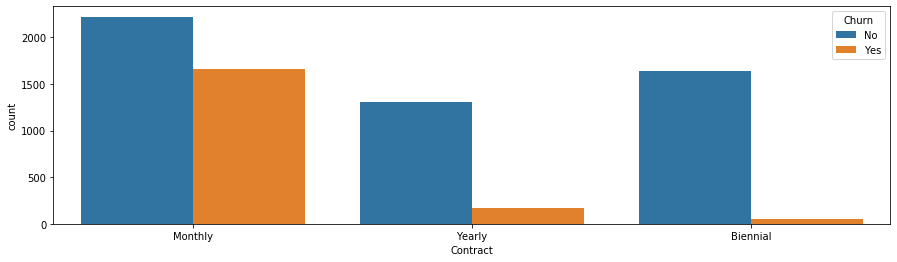

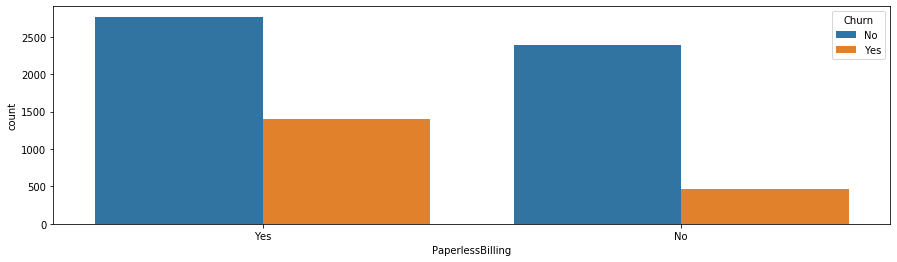

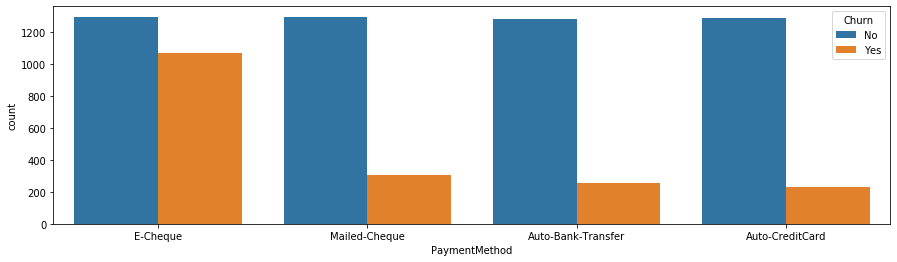

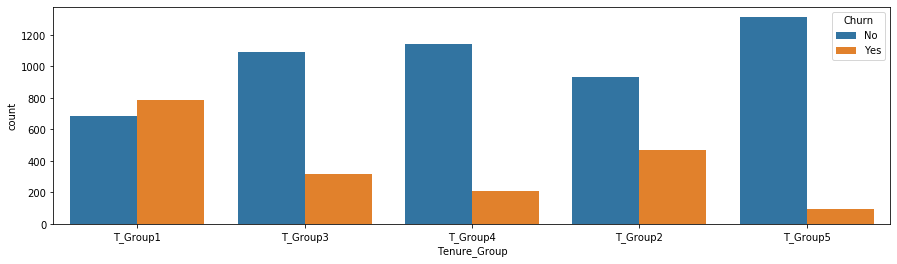

In [21]:
for i in [x for x in df.columns if x not in num_df + ['Churn']] :
    plt.figure(figsize=(15,4))
    sns.countplot(x=i, data=df, hue='Churn')

Observations:
    1. Majority of malea and females have 'not churn'.
    2. Senior Citizens have less churn rate. It explains the dedication at this age.
    3. When there is no partner for the customer, the churn rate is high.
    4. Also, single customers have higher churn rate compared to customers with dependents.
    5. Majority of the customers do have a phone service and most of them have less churn rate.
    6. Customers with/without multiple line have the same churn rate with 1000 count.
    7. Churn rate is higher for customers with fiber optic service. This could explain that fiber optic must have faulty lines.
    8. Most customers who did not have online backup left the service.
    9. Customers who did not receive technical support left the service.
    10. Churn rate has the same effect in terms of StreamingTV. Whereas, customers who couldn't stream movies has high Churn Rate.
    11. Majority of the customers preferred monthly plans, and customers who preferred biennial plans have very low churn rate.
    12. Almost 50% of customers who preferred paperless billing has high churn rate.
    13. Customers who paid using e-cheque has more churn rate. This could be due to a transactional flaw.
    14. Customers who fall under T_Group1 have extremely high churn rate. Long term customers have very low churn rate.

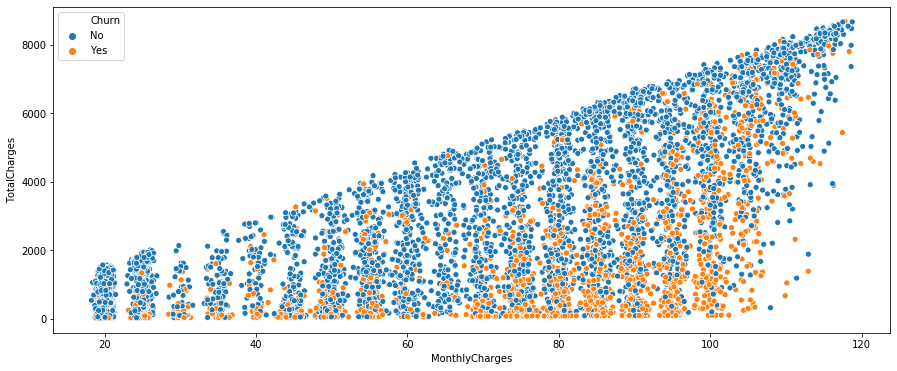

In [22]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)

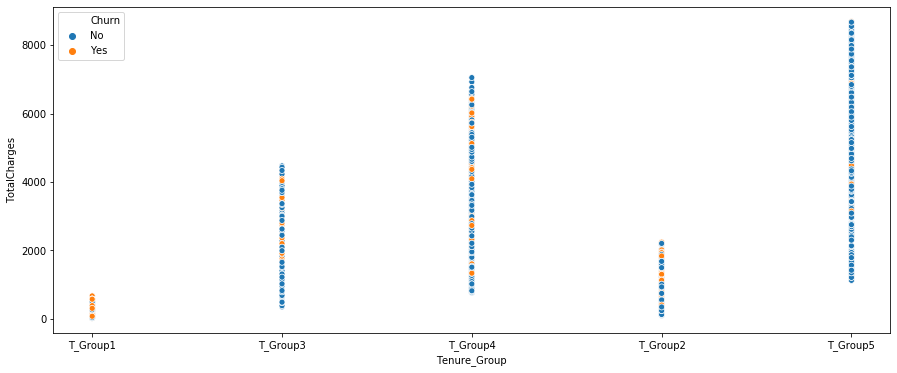

In [23]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Tenure_Group', y='TotalCharges', hue='Churn', data=df)

Text(0, 0.5, '% of Churn')

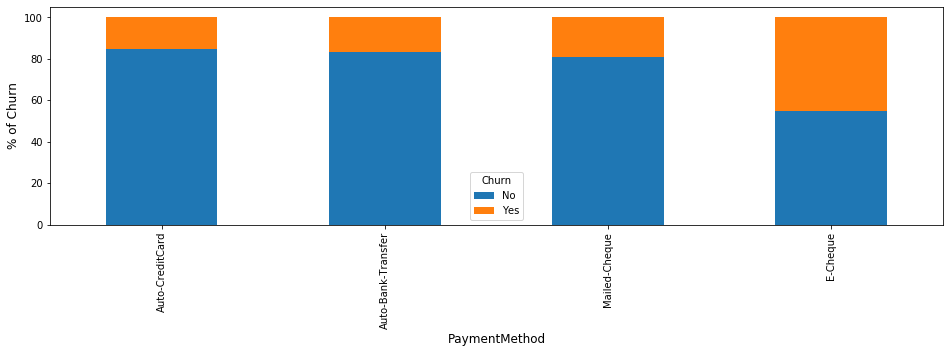

In [24]:
tbl=pd.crosstab(df['PaymentMethod'], df['Churn'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('PaymentMethod',fontsize=12)
plt.ylabel('% of Churn',fontsize=12)

Text(0, 0.5, '% of StreamingTV')

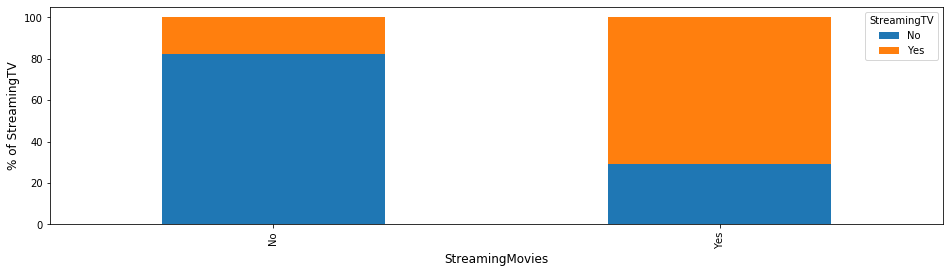

In [25]:
tbl=pd.crosstab(df['StreamingMovies'], df['StreamingTV'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('StreamingMovies',fontsize=12)
plt.ylabel('% of StreamingTV',fontsize=12)

Text(0, 0.5, '% of PaperlessBilling')

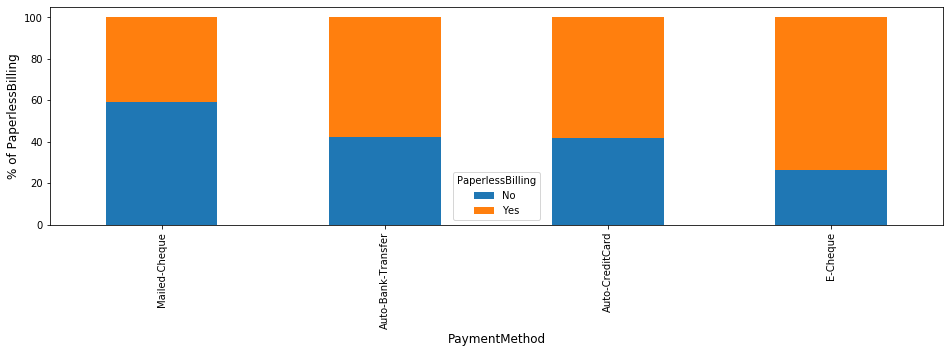

In [26]:
tbl=pd.crosstab(df['PaymentMethod'], df['PaperlessBilling'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('PaymentMethod',fontsize=12)
plt.ylabel('% of PaperlessBilling',fontsize=12)

Text(0, 0.5, '% of MultipleLines')

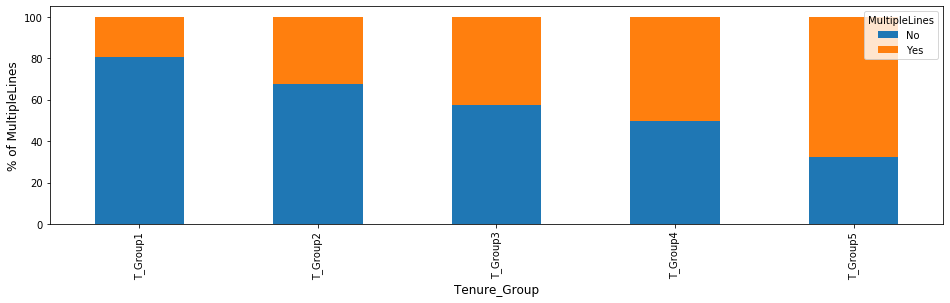

In [27]:
tbl=pd.crosstab(df['Tenure_Group'], df['MultipleLines'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Tenure_Group',fontsize=12)
plt.ylabel('% of MultipleLines',fontsize=12)

Text(0, 0.5, '% of gender')

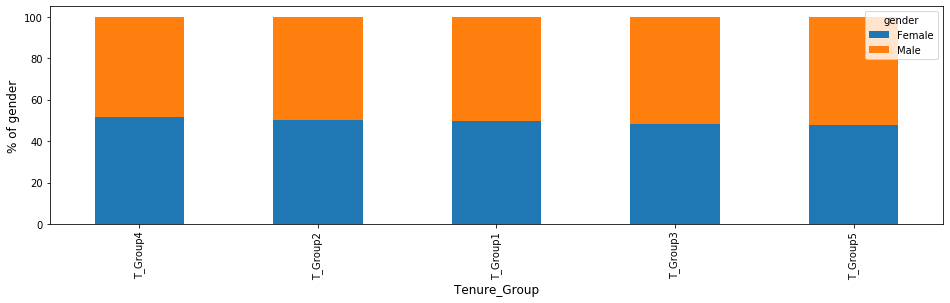

In [28]:
tbl=pd.crosstab(df['Tenure_Group'], df['gender'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Male').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Tenure_Group',fontsize=12)
plt.ylabel('% of gender',fontsize=12)

Text(0, 0.5, '% of Churn')

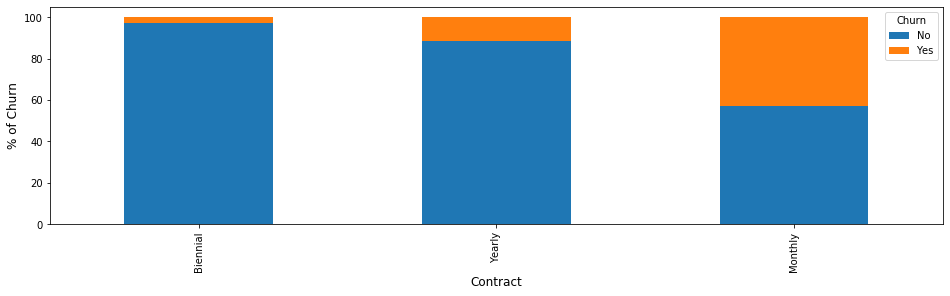

In [29]:
tbl=pd.crosstab(df['Contract'], df['Churn'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Contract',fontsize=12)
plt.ylabel('% of Churn',fontsize=12)

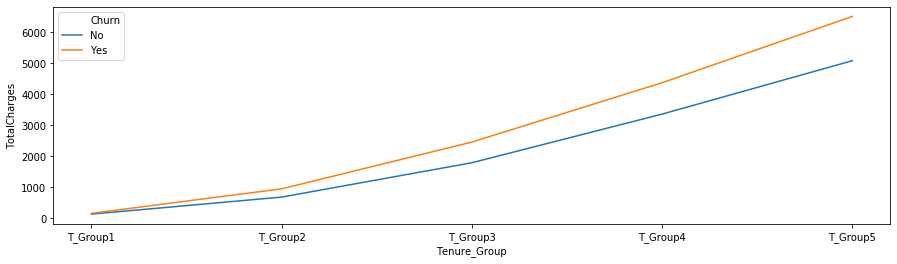

In [30]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Tenure_Group',y='TotalCharges',hue='Churn',data=df, ci=None)

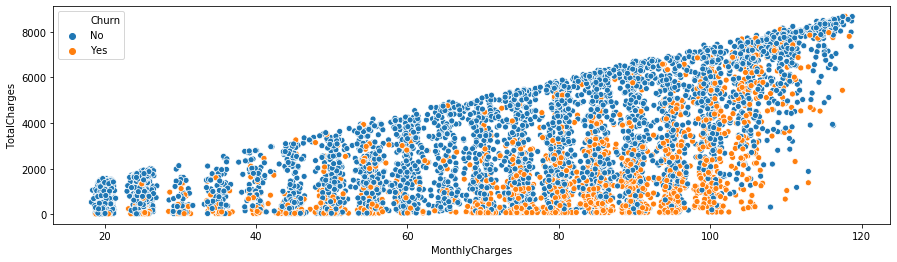

In [31]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df)

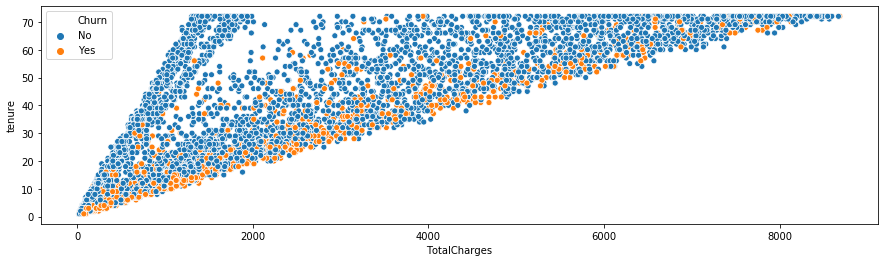

In [32]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',data=df)

### Converting Categorical to Numerical features

In [33]:
for i in cat_df:
    print(i, '>>', df[i].unique(), '>>', df[i].nunique())

gender >> ['Female' 'Male'] >> 2
SeniorCitizen >> ['No' 'Yes'] >> 2
Partner >> ['Yes' 'No'] >> 2
Dependents >> ['No' 'Yes'] >> 2
PhoneService >> ['No' 'Yes'] >> 2
MultipleLines >> ['No' 'Yes'] >> 2
InternetService >> ['DSL' 'Fiber optic' 'No'] >> 3
OnlineSecurity >> ['No' 'Yes'] >> 2
OnlineBackup >> ['Yes' 'No'] >> 2
DeviceProtection >> ['No' 'Yes'] >> 2
TechSupport >> ['No' 'Yes'] >> 2
StreamingTV >> ['No' 'Yes'] >> 2
StreamingMovies >> ['No' 'Yes'] >> 2
Contract >> ['Monthly' 'Yearly' 'Biennial'] >> 3
PaperlessBilling >> ['Yes' 'No'] >> 2
PaymentMethod >> ['E-Cheque' 'Mailed-Cheque' 'Auto-Bank-Transfer' 'Auto-CreditCard'] >> 4
Churn >> ['No' 'Yes'] >> 2
Tenure_Group >> ['T_Group1' 'T_Group3' 'T_Group4' 'T_Group2' 'T_Group5'] >> 5


In [34]:
# Instantiate LabelEncoder
le = LabelEncoder()
for i in cat_df:
    if df[i].nunique() == 2:
        df[i]=le.fit_transform(df[i])
    else: continue

In [35]:
df = pd.get_dummies(df)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Yearly,PaymentMethod_Auto-Bank-Transfer,PaymentMethod_Auto-CreditCard,PaymentMethod_E-Cheque,PaymentMethod_Mailed-Cheque,Tenure_Group_T_Group1,Tenure_Group_T_Group2,Tenure_Group_T_Group3,Tenure_Group_T_Group4,Tenure_Group_T_Group5
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [36]:
# Splitting x and y from data
x = df.drop(columns=['Churn'], axis=1)
y = df['Churn']
print('Shape of x :: %s\nShape of y :: %s' %(x.shape, y.shape))

Shape of x :: (7032, 31)
Shape of y :: (7032,)


In [37]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

### Machine Learning Algorithms

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (5625, 31) | x_test.shape --> (1407, 31) 
y_train.shape --> (5625,) | y_test.shape --> (1407,)


In [39]:
# Instantiate all models
logr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
bgc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [40]:
models={'Logistic Regression':logr,
        'Gaussian NB':gnb,
        'Support Vector Machine':svc,
        'KNeighbors Classifier':knn,
        'Decision Tree Classifier':dtc,
        'XGB Classifier':xgb,
        'Random Forest Classifier':rf,
        'Bagging Classifier':bgc,
        'Extra Trees Classifier':etc,
        'Gradient Boosting Classifier':gbc
       }

In [41]:
def main(cls):
    a_scores=[]
    for model_name,model in cls.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        score=accuracy_score(y_test,y_pred)
        a_scores.append(score*100)
        print('##############################',model_name,'##############################')
        print('>>> Accuracy Score = %0.2f' %(score*100))
        c_matrix=confusion_matrix(y_test,y_pred)
        print('>>> Confusion Matrix: \n',c_matrix)
        TN,FP,FN,TP=c_matrix[0,0],c_matrix[0,1],c_matrix[1,0],c_matrix[1,1]
        print('>>> Recall Score = %0.2f' %((TP)*100/float(TP+FN)))
        print('>>> Specificity = %0.2f' %(TN*100/float(TN+FP)))
        print('>>> False Positive Rate = %0.2f' %(FP*100/float(FP+TN)))
        print('>>> Precision Score = %0.2f' %(TP*100/float(TP+FP)))
        print('>>> Classification Report:')
        print(classification_report(y_test,y_pred))
    return a_scores

In [42]:
a_scores=main(models)

############################## Logistic Regression ##############################
>>> Accuracy Score = 78.54
>>> Confusion Matrix: 
 [[931 102]
 [200 174]]
>>> Recall Score = 46.52
>>> Specificity = 90.13
>>> False Positive Rate = 9.87
>>> Precision Score = 63.04
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

############################## Gaussian NB ##############################
>>> Accuracy Score = 73.13
>>> Confusion Matrix: 
 [[741 292]
 [ 86 288]]
>>> Recall Score = 77.01
>>> Specificity = 71.73
>>> False Positive Rate = 28.27
>>> Precision Score = 49.66
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80

In [43]:
p=pd.DataFrame(data=a_scores,columns=['Accuracy Score'], index=list(models.keys())).sort_values(by = 'Accuracy Score', ascending=False)
print(p)

                              Accuracy Score
Gradient Boosting Classifier       79.744136
Support Vector Machine             79.104478
Random Forest Classifier           78.678038
Logistic Regression                78.535892
XGB Classifier                     77.754087
Extra Trees Classifier             77.398721
Bagging Classifier                 77.256574
KNeighbors Classifier              75.764037
Gaussian NB                        73.134328
Decision Tree Classifier           72.707889


Let's take the top 4 models and perform cross validation

In [44]:
new_models={'Gradient Boosting Classifier':gbc,
            'Support Vector Machine':svc,
            'Logistic Regression':logr,
            'Random Forest Classifier':rf
           }

In [45]:
cv_scores=[]
for model_name,model in new_models.items():
    score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
    cv_scores.append((score.mean())*100)
    print(model_name,' >>> Completed')
print(cv_scores)

Gradient Boosting Classifier  >>> Completed
Support Vector Machine  >>> Completed
Logistic Regression  >>> Completed
Random Forest Classifier  >>> Completed
[80.07155363678311, 80.12446034525261, 80.90718886493934, 79.27194806672439]


In [46]:
pd.DataFrame(data=cv_scores, columns=['New Accuracy Score'], index=list(new_models.keys())).join(p)

,New Accuracy Score,Accuracy Score
Gradient Boosting Classifier,80.071554,79.744136
Support Vector Machine,80.124460,79.104478
Logistic Regression,80.907189,78.535892
Random Forest Classifier,79.271948,78.678038


We can see that we can achieve 80.90% accuracy using Logistic Regression.

## Hyperparameter Tuning

In [47]:
# Instantiating with default values
logr = LogisticRegression(random_state=42)

### GridSearchCV Hyperparameter Tuning

In [48]:
logr_param = {'C':[0.0001,0.001,0.01,0.1,1,10,100],
              'penalty':['l1','l2']
             }

b_logr = GridSearchCV(logr, logr_param)
b_logr.fit(x_train,y_train)
print('Logistic Regression >>>', b_logr.best_params_)

Logistic Regression >>> {'C': 0.01, 'penalty': 'l2'}


In [49]:
# Instantiating with new parameters
logr = LogisticRegression(random_state=42, C=0.01, penalty='l2')
logr.fit(x_train,y_train)
y_pred = logr.predict(x_test)
score = accuracy_score(y_test,y_pred)
print('>>> Accuracy Score = %0.2f' %(score*100))

>>> Accuracy Score = 78.54


Conclusion:
    1. We were able to achieve a better score using cross validation for Logistic Regression.
    2. However, we could not obtain the same using hyperparameter tuning.
    3. By performing a gridsearch, we can further fine tune the model to get better results.
    3. Since we were able to get a better score for Gradient Boosting Classifier, we will go with that.

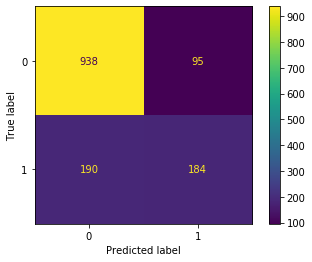

In [50]:
# Plotting Confusion Matrix
gbc.fit(x_train,y_train)
plot_confusion_matrix(gbc, x_test, y_test)

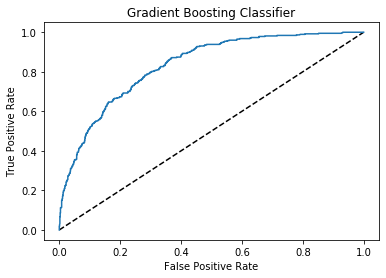

In [51]:
# Plotting ROC Curve for the model
y_pred_prob = gbc.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

In [52]:
#Exporting model as pkl file
joblib.dump(gbc,'GBC_Telecom_customer_churn.pkl')

['GBC_Telecom_customer_churn.pkl']